In [74]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [75]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

586

In [76]:
#api_key = 'dabf0acaf80726da466d006e94ce41c9'
#api_key

In [77]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=dabf0acaf80726da466d006e94ce41c9&units=imperial&q='

In [78]:
junk_url = f"{url}appid={api_key}&units={units}&q=chicago"
junk_url
response = requests.get(junk_url).json()
response

{'coord': {'lon': -87.62, 'lat': 41.88},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 45.68,
  'pressure': 1011,
  'humidity': 47,
  'temp_min': 43.7,
  'temp_max': 48.2},
 'visibility': 16093,
 'wind': {'speed': 20.8, 'deg': 290, 'gust': 15.9},
 'clouds': {'all': 40},
 'dt': 1546977180,
 'sys': {'type': 1,
  'id': 4861,
  'message': 0.0072,
  'country': 'US',
  'sunrise': 1546953464,
  'sunset': 1546987052},
 'id': 4887398,
 'name': 'Chicago',
 'cod': 200}

In [79]:
# set up lists to hold reponse info
cities_with_data = []
lat = []
temp = []
humidity = []
cloudiness = []
wind_speed = []

for city in cities:
    response = requests.get(query_url + city).json()
    try:
        cities_with_data.append(response['name'])
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
    except: 
        pass

print(cities_with_data)
print(lat)
print(temp)
print(humidity)
print(cloudiness)
print(wind_speed)

['Kapaa', 'Rikitea', 'Bredasdorp', 'Qaanaaq', 'Castro', 'Coquimbo', 'Butaritari', 'Naze', 'Cape Town', 'Nikolskoye', 'Kajiado', 'Mataura', 'Georgetown', 'Miranda de Ebro', 'Kruisfontein', 'Moctezuma', 'Nishihara', 'Kizilskoye', 'Ushuaia', 'Provideniya', 'Nanortalik', 'Plettenberg Bay', 'Kavieng', 'Punta Arenas', 'Puerto Ayora', 'Saint-Joseph', 'Faanui', 'Lake Cowichan', 'Konigstein', 'Gari', 'Avarua', 'Saint-Philippe', 'Dikson', 'Puerto Baquerizo Moreno', 'Atuona', 'Bethel', 'Alofi', 'Tamiahua', 'Busselton', 'Yar-Sale', 'Klaksvik', 'New Norfolk', 'Elverum', 'Coroata', 'Bambous Virieux', 'Karad', 'Imbituba', 'Torbay', 'Mehamn', 'Hobart', 'Mahebourg', 'Katsuura', 'Aksu', 'Jamestown', 'Upernavik', 'Aklavik', 'Albany', 'Minamiashigara', 'Vanderhoof', 'Fortuna', 'Victoria', 'Pevek', 'Nchelenge', 'Tiksi', 'Khatanga', 'Hermanus', 'Ponta do Sol', 'Abbeyfeale', 'Alyangula', 'Hilo', 'Houma', 'Calama', 'Magadan', 'High Level', 'Namibe', 'Hithadhoo', 'Mar del Plata', 'Westport', 'Vao', 'Tamandare'

In [80]:
city_data = pd.DataFrame(cities_with_data)
city_data['temp'] = temp
city_data['humidity'] = humidity
city_data['latitude'] = lat
city_data['cloudiness'] = cloudiness
city_data['wind speed'] = wind_speed
city_data

,0,temp,humidity,latitude,cloudiness,wind speed
0,Kapaa,78.08,68,22.08,75,4.63
1,Rikitea,80.63,95,-23.12,32,15.86
2,Bredasdorp,68.00,77,-34.53,92,8.05
3,Qaanaaq,-14.06,82,77.48,0,9.93
4,Castro,55.40,58,-42.48,75,18.34
5,Coquimbo,71.60,49,-29.95,0,14.99
6,Butaritari,84.09,100,3.07,20,8.43
7,Naze,75.20,64,5.43,0,5.35
8,Cape Town,68.00,72,-33.93,20,20.80
9,Nikolskoye,26.60,92,59.70,75,4.47


In [81]:
city_data.to_csv('cities.csv')

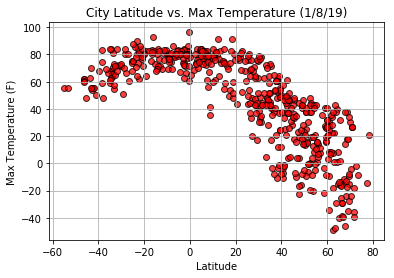

In [82]:
#PLOT
x_axis = np.arange(-90, 90, 1)
y_axis = np.arange(-50, 125, 1)
plt.title("City Latitude vs. Max Temperature (1/8/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.scatter(lat, temp, marker="o", facecolors="red", 
            edgecolors="black", alpha=0.75)
plt.savefig('Lat_v_Temp.png')

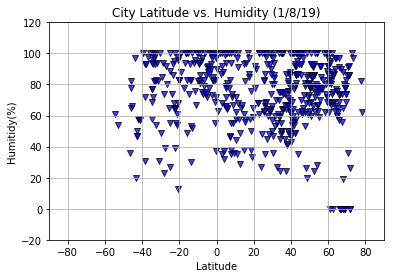

In [83]:
plt.ylim(-20,120, 1)
plt.xlim(-90,90)
x_axis = np.arange(-90, 90, 1)
y_axis = np.arange(0, 100, 10)

plt.grid()
plt.title("City Latitude vs. Humidity (1/8/19)")
plt.xlabel("Latitude")
plt.ylabel("Humitidy(%)")
plt.scatter(lat, humidity, marker="v", facecolors="blue", 
            edgecolors="black", alpha=0.75)
plt.savefig('Lat_v_Humidity.png')

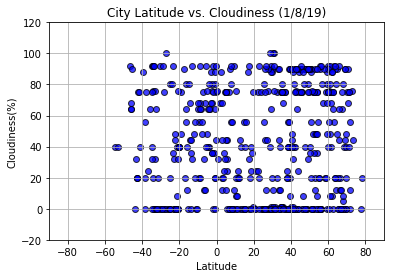

In [84]:
plt.ylim(-20,120, 1)
plt.xlim(-90,90)
x_axis = np.arange(-90, 90, 1)
y_axis = np.arange(0, 100, 10)

plt.grid()
plt.title("City Latitude vs. Cloudiness (1/8/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.scatter(lat, cloudiness, marker="o", facecolors="blue", 
            edgecolors="black", alpha=0.75)
plt.savefig('Lat_v_Cloudiness.png')

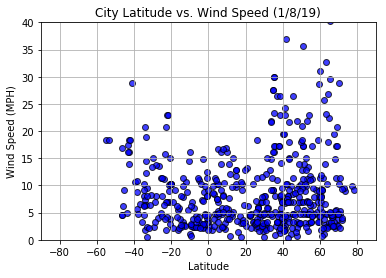

In [85]:
plt.ylim(0,40, 1)
plt.xlim(-90,90)
x_axis = np.arange(-90, 90, 1)
y_axis = np.arange(0, 100, 10)

plt.grid()
plt.title("City Latitude vs. Wind Speed (1/8/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.scatter(lat, wind_speed, marker="o", facecolors="blue", 
            edgecolors="black", alpha=0.75)
plt.savefig('Lat_v_WindSpeed.png')